In [1]:
import numpy as np;
from scipy.optimize import minimize 
import time
import matplotlib.pyplot as plt
import sklearn.linear_model
import cv2
import copy
import random
from scipy.sparse import csr_matrix 
import scipy.sparse.linalg
import pandas as pd

In [5]:
data = {}
for m in [5, 10, 15, 20, 25, 30, 35]:
    for num_samples in range(15000, 30000, 3000):
        ns = num_samples//1000
        data[(m, ns)] = pd.read_csv("kagg_out/results/log_n150_m{}_sam{}.csv".format(m, ns))

In [70]:
data_altmin = {}
for m in [5, 10, 15, 20, 25, 30, 35]:
    for num_samples in range(15000, 30000, 3000):
        ns = num_samples//1000
        data_altmin[(m, ns)] = pd.read_csv("kagg_out/results_altmin/altmin_n150_m{}_sam{}.csv".format(m, ns))

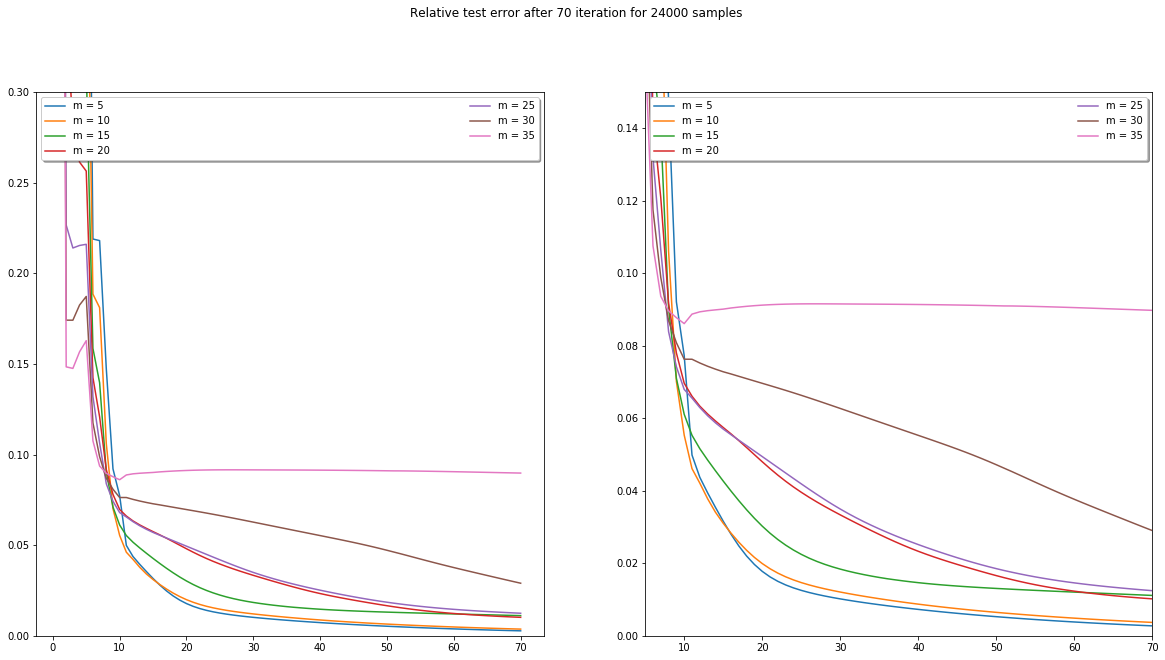

In [49]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 24)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.3])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)

plt.subplot(1, 2, 2)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 24)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.15])
plt.xlim([5, 70])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Relative test error after 70 iteration for {} samples".format(24000), va = 'bottom')
plt.show()

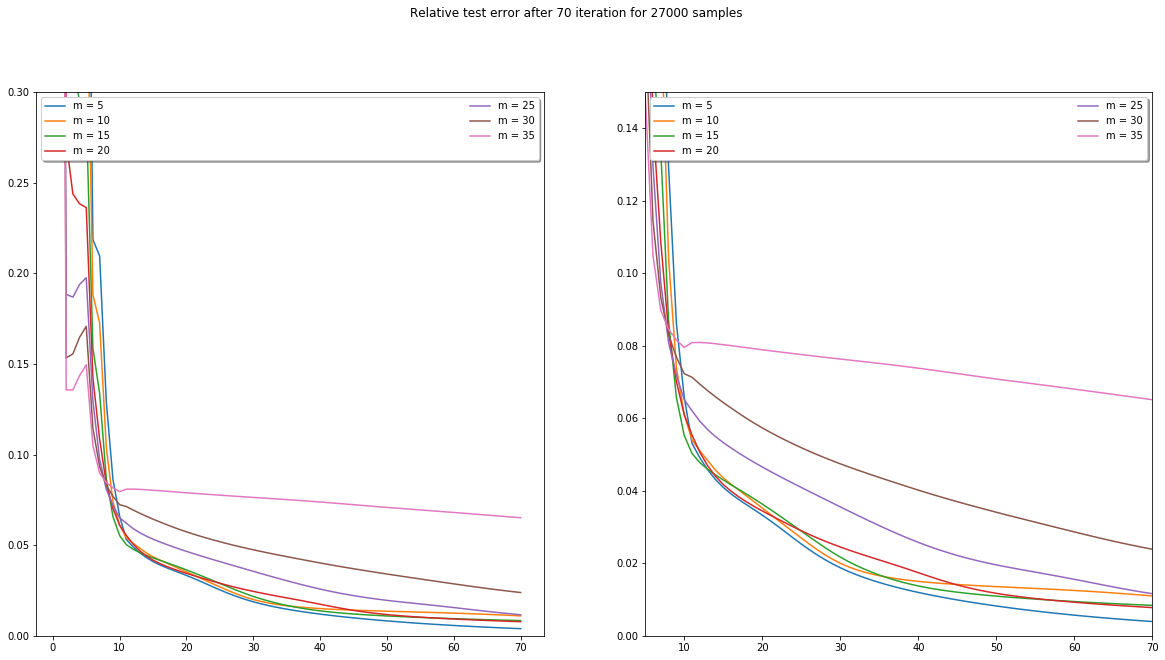

In [50]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 27)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.3])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)

plt.subplot(1, 2, 2)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 27)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.15])
plt.xlim([5, 70])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Relative test error after 70 iteration for {} samples".format(27000), va = 'bottom')
plt.show()

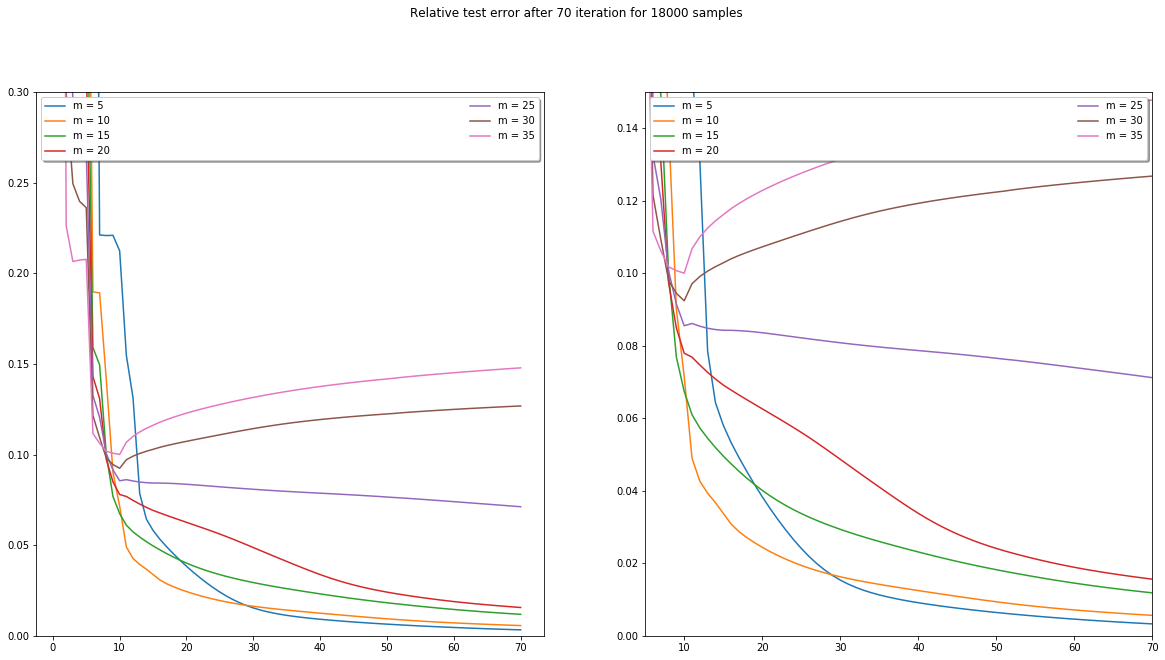

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 18)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.3])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)

plt.subplot(1, 2, 2)
for m in [5, 10, 15, 20, 25, 30, 35]:
    plt.plot(data[(m, 24)]['iter'], data[(m, 18)]['test_err'], label = "m = {}".format(m))
plt.ylim([0.0, 0.15])
plt.xlim([5, 70])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Relative test error after 70 iteration for {} samples".format(18000), va = 'bottom')
plt.show()

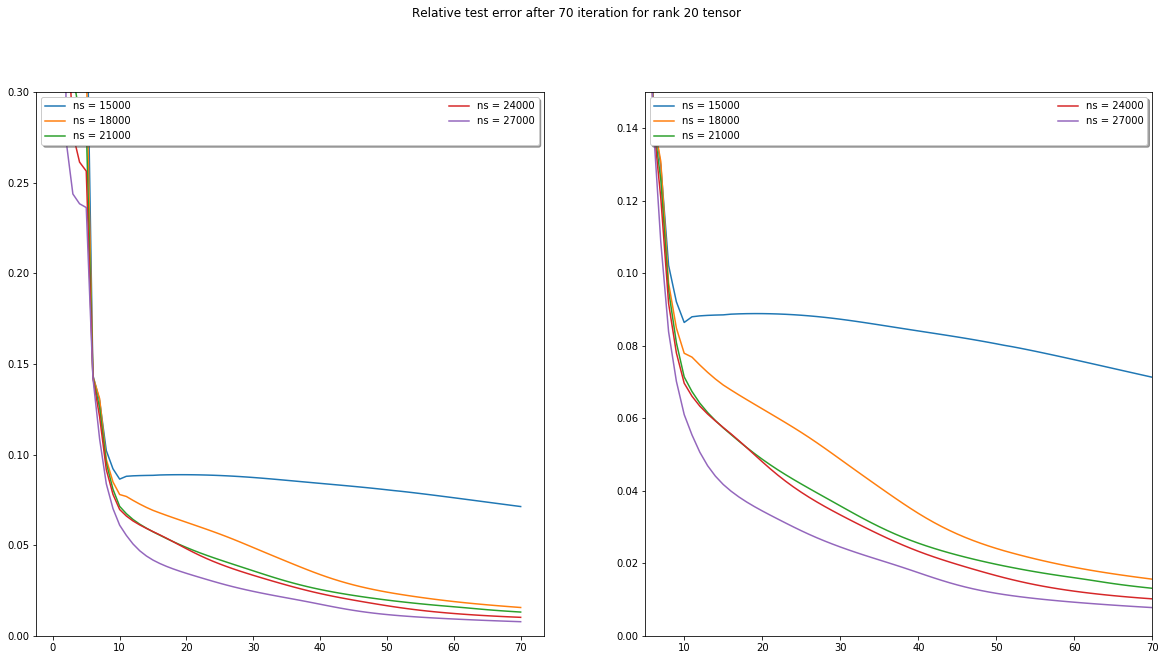

In [69]:
plt.figure(figsize=(20,10))
m = 20
plt.subplot(1, 2, 1)
for ns in [15, 18, 21, 24, 27]:
    plt.plot(data[(m, ns)]['iter'], data[(m, ns)]['test_err'], label = "ns = {}".format(ns*1000))
plt.ylim([0.0, 0.3])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)

plt.subplot(1, 2, 2)
for ns in  [15, 18, 21, 24, 27]:
    plt.plot(data[(m, ns)]['iter'], data[(m, ns)]['test_err'], label = "ns = {}".format(ns*1000))
plt.ylim([0.0, 0.15])
plt.xlim([5, 70])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Relative test error after 70 iteration for rank {} tensor".format(m), va = 'bottom')
plt.show()

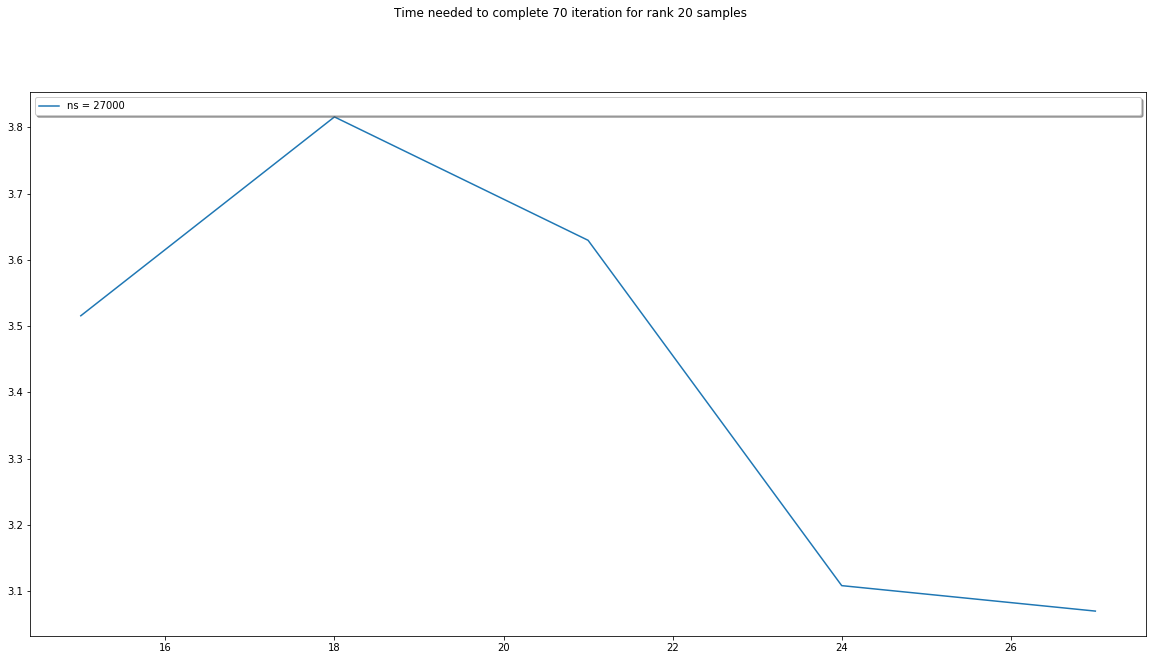

In [62]:
plt.figure(figsize=(20,10))
m = 20
plt.plot([15, 18, 21, 24, 27], [data[(m, ns)]['time'][69] for ns in [15, 18, 21, 24, 27]], label = "ns = {}".format(ns*1000))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Time needed to complete 70 iteration for rank {} samples".format(m), va = 'bottom')
plt.show()

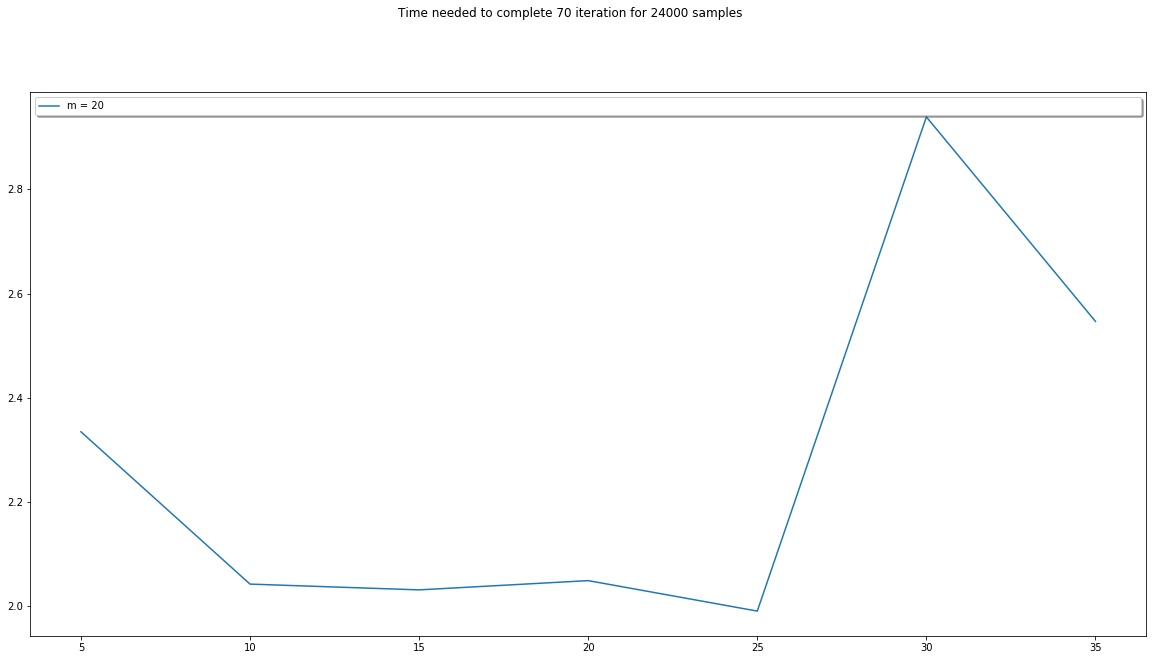

In [68]:
[5, 10, 15, 20, 25, 30, 35]
plt.figure(figsize=(20,10))
ns = 24
plt.plot([5, 10, 15, 20, 25, 30, 35], [data[(m, ns)]['time'][69]/m**1.2 for m in [5, 10, 15, 20, 25, 30, 35]], label = "m = {}".format(m))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.suptitle("Time needed to complete 70 iteration for {} samples".format(ns*1000), va = 'bottom')
plt.show()

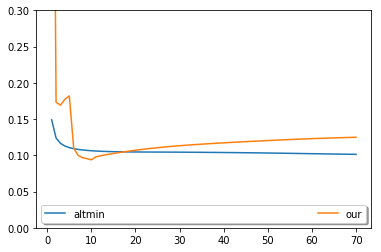

In [95]:
m = 35
plt.plot(data_altmin[(m, 24)]['iter'], data_altmin[(m, 24)]['test_err'], label = "altmin".format(m))
plt.plot(data[(m, 21)]['iter'], data[(m, 21)]['test_err'], label = "our".format(m))
plt.ylim([0, 0.3])
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.show()

(0, 0.05)

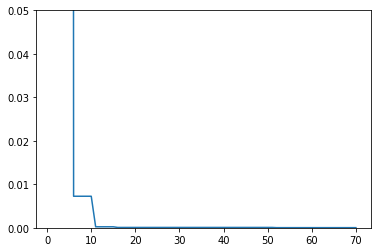

In [100]:
plt.plot(data[(m, 24)]['iter'], data[(m, 27)]['mu'], label = "".format(m))
plt.ylim([0, 0.05])

In [101]:
data_ourlong = pd.read_csv("kagg_out/res-our-altmin/log_n150_m30_sam24.csv")
data_altlong = pd.read_csv("kagg_out/res-our-altmin/altmin_n150_m30_sam24.csv")

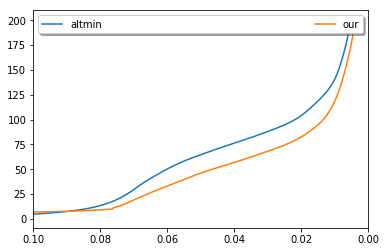

In [115]:
m = 30
plt.plot( data_altlong['test_err'], data_altlong['iter'], label = "altmin".format(m))
plt.plot(data_ourlong['test_err'], data_ourlong['iter'],  label = "our".format(m))
plt.xlim([0.1, 0])
leg = plt.legend(loc='upper right', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.show()

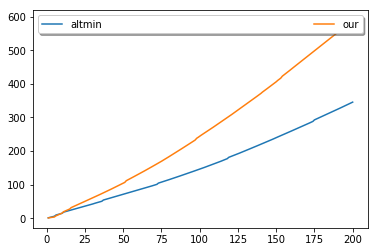

In [117]:
m = 30
plt.plot(  data_altlong['iter'],data_altlong['time'], label = "altmin".format(m))
plt.plot( data_ourlong['iter'], data_ourlong['time'], label = "our".format(m))
#plt.xlim([0.1, 0])
leg = plt.legend(loc='upper right', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.show()